# Project


**Lecture section: TC1L**

**Tutorial section: TT2L**

| | Student ID     | Student Name                        
|--:|:-------------|:------------------------------------
| 1 | 1211101888   | SHAHNAZ BINTI HUSAIN SUKRI          
| 2 | 1221303909   | MUHAMMAD UKASYAH BIN MD YUSOF           
               


## Introduction

In Malaysia, recent trends have shown a decrease in birth rates, which poses challenges for future economic growth and demographic stability. Understanding the factors contributing to this decline and predicting future trends are vital for the government to make informed decisions.

### Dataset Overview

This dataset contains annual number of births with signs of life upon delivery from the year 2000 - 2022

In [2]:
# Reads the .csv file
import pandas as pd

original = pd.read_csv('birth.csv')
print(original.isnull().sum())
original.head()

date    0
abs     0
rate    0
dtype: int64


,date,abs,rate
0,2000-01-01,537853,22.9
1,2001-01-01,505479,21.0
2,2002-01-01,494538,20.2
3,2003-01-01,481399,19.2
4,2004-01-01,481800,18.9


## Data Pre-processing

- renaming columns
- adding column 'year'
- adding extra variables to dataset

In [3]:
import pandas as pd

# Reads the .csv file into variable df 
df1 = pd.read_csv('birth.csv')

# Rename column
df1 = df1.rename(columns={'abs':'Births', 
                        'rate':'Birth Rate'})

# Add column Year
# Convert date column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Extract year from date column
df1['Year'] = df1['date'].dt.year

df1.head()

,date,Births,Birth Rate,Year
0,2000-01-01,537853,22.9,2000
1,2001-01-01,505479,21.0,2001
2,2002-01-01,494538,20.2,2002
3,2003-01-01,481399,19.2,2003
4,2004-01-01,481800,18.9,2004


In [4]:
# Adding other variables from other available datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df2 = pd.read_csv('API_MYS_DS2_en_csv_v2_751601.csv', skiprows=4)

# Selecting relevant indicators
indicators_of_interest = [
    'GDP per capita (current US$)',
    'Inflation, consumer prices (annual %)',
    'Life expectancy at birth, total (years)',
    'Mortality rate, infant (per 1,000 live births)',
    'Population growth (annual %)',
    'Urban population (% of total population)'
]

# Filtering the dataset for these indicators
filtered_data = df2[df2['Indicator Name'].isin(indicators_of_interest)]

# Dropping irrelevant columns and years
years = [str(year) for year in range(1960, 2000)]
df2 = filtered_data.drop(columns=['Country Name', 'Country Code', 'Indicator Code', 'Unnamed: 68', '2023'] + years)

# Reshaping the dataset to have years as rows
df2 = df2.set_index(['Indicator Name']).T
df2.reset_index(inplace=True)

# Merge df1 and df2 
df2['Births'] = df1['Births']
df2['Birth Rate'] = df1['Birth Rate']

# Rename column
df2 = df2.rename(columns={'index':'Year'})

# Saving cleaned dataframe csv file 'birth_rates_extra.csv'
df2.to_csv('birth_rates_extra.csv', index=False)

In [5]:
# Reads the .csv file into variable df 
df = pd.read_csv('birth_rates_extra.csv')
df

,Year,"Inflation, consumer prices (annual %)",Urban population (% of total population),"Mortality rate, infant (per 1,000 live births)",Population growth (annual %),GDP per capita (current US$),"Life expectancy at birth, total (years)",Births,Birth Rate
0,2000,1.534740,61.977,8.7,2.544594,4087.562593,72.775,537853,22.9
1,2001,1.416785,62.922,8.1,2.570144,3941.122666,73.344,505479,21.0
2,2002,1.807872,63.856,7.6,2.516347,4177.104942,73.563,494538,20.2
3,2003,1.089676,64.780,7.3,2.442606,4454.526764,73.796,481399,19.2
4,2004,1.421271,65.694,7.1,2.372008,4924.338111,73.898,481800,18.9
5,2005,2.975071,66.594,7.0,2.303364,5536.837483,74.096,474473,18.2
6,2006,3.609236,67.483,7.0,2.234860,6137.150540,74.164,472698,17.8
7,2007,2.027353,68.360,7.0,2.176090,7144.000240,74.211,479647,17.7
8,2008,5.440782,69.225,7.0,2.088185,8343.303382,74.250,493203,17.9
9,2009,0.583308,70.075,7.0,1.978923,7167.877194,74.227,501644,17.9


## EDA - Analyzing Birth Rates

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reads the dataset
data = pd.read_csv('birth_rates_extra.csv')

# Subset of attributes
data1 = data[[
        'GDP per capita (current US$)',
        'Inflation, consumer prices (annual %)',
        'Life expectancy at birth, total (years)',
        'Mortality rate, infant (per 1,000 live births)',
        'Population growth (annual %)',
        'Urban population (% of total population)',
        'Births', 'Birth Rate'
]]

cor = data1.corr()
display(cor)

,GDP per capita (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),Urban population (% of total population),Births,Birth Rate
GDP per capita (current US$),1.000000,0.097371,0.907711,-0.717857,-0.960333,0.951148,-0.111952,-0.849597
"Inflation, consumer prices (annual %)",0.097371,1.000000,-0.038495,-0.139202,0.045968,-0.017345,-0.060011,-0.029208
"Life expectancy at birth, total (years)",0.907711,-0.038495,1.000000,-0.760901,-0.940157,0.956391,-0.268903,-0.916661
"Mortality rate, infant (per 1,000 live births)",-0.717857,-0.139202,-0.760901,1.000000,0.684107,-0.741219,0.414094,0.830009
Population growth (annual %),-0.960333,0.045968,-0.940157,0.684107,1.000000,-0.991120,0.221132,0.910254
Urban population (% of total population),0.951148,-0.017345,0.956391,-0.741219,-0.991120,1.000000,-0.264984,-0.942013
Births,-0.111952,-0.060011,-0.268903,0.414094,0.221132,-0.264984,1.000000,0.555061
Birth Rate,-0.849597,-0.029208,-0.916661,0.830009,0.910254,-0.942013,0.555061,1.000000


<Axes: >

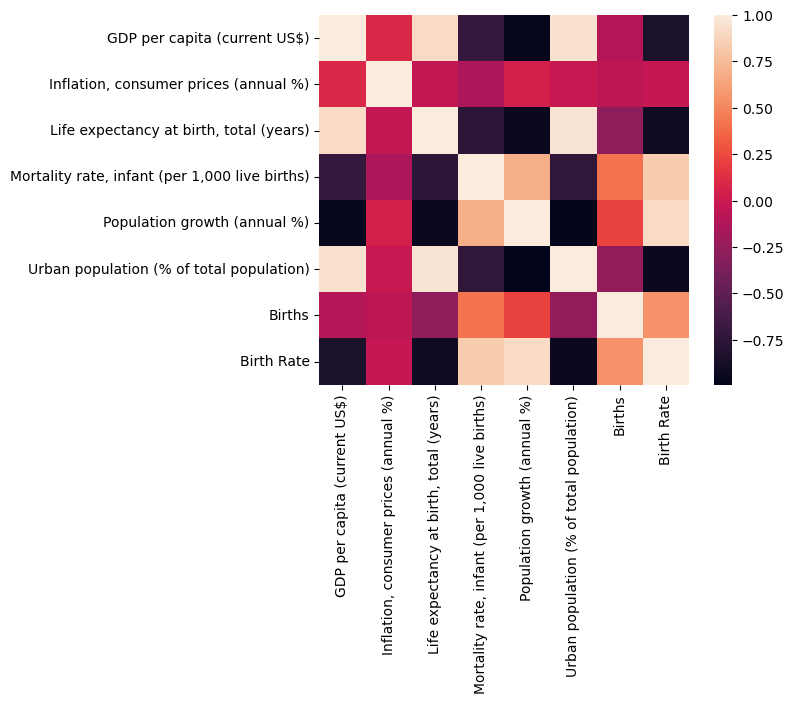

In [7]:
import seaborn as sns
%matplotlib inline

sns.heatmap(cor, square = True)

- **Economic Growth and Birth Rates:** The negative correlation between GDP per capita and birth rates suggests that as Malaysia’s economy grows, the birth rates decrease. This aligns with global trends where economic development leads to lower fertility rates due to various factors such as better access to education, family planning, and shifts in societal norms.

- **Urbanization:** Increased urbanization is associated with economic growth and a lower birth rate, indicating that people in urban areas tend to have
fewer children due to factors such as higher living costs, career aspirations, and better access to healthcare and family planning services.

- **Life Expectancy and Mortality:** Higher GDP per capita and life expectancy are associated with lower infant mortality rates, reflecting improved healthcare services and overall living conditions.

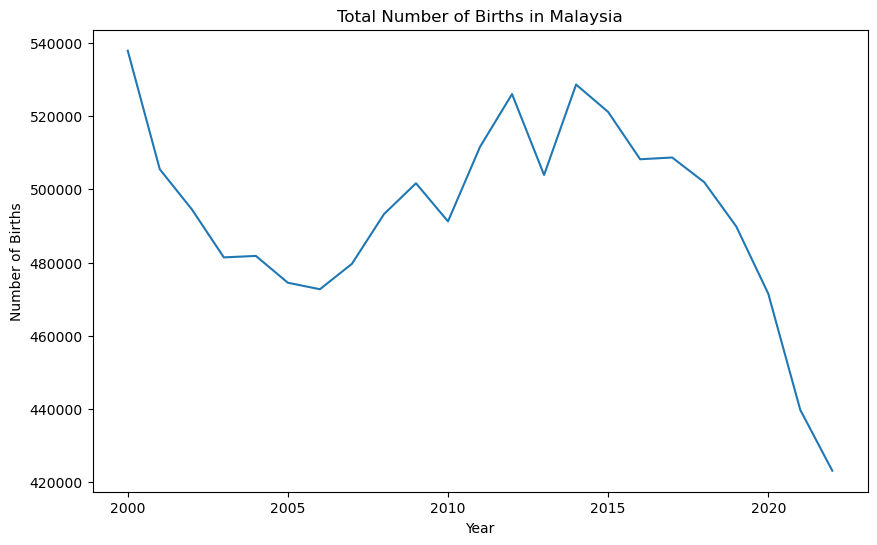

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reads the dataset
data = pd.read_csv('birth_rates_extra.csv')

# Analyzing total number of birth rates by year in Malaysia 
# Plot the number of births by over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Births')
plt.title('Total Number of Births in Malaysia')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

#### 1. Total Number of Births in Malaysia
- Noticeable decline in the number of births from around 2000 to 2006.
- After the initial decline, there is a period of increase and fluctuations from around 2006 to 2015.
- From around 2015 onwards, there is a steady decline in the overall number of births in Malaysia.

Implications: The decline in the number of births aligns with the decrease in the population growth rate. Factors contributing to this trend may include economic considerations, changes in societal norms, better family planning and reproductive health services, and increased participation of women in the workforce.

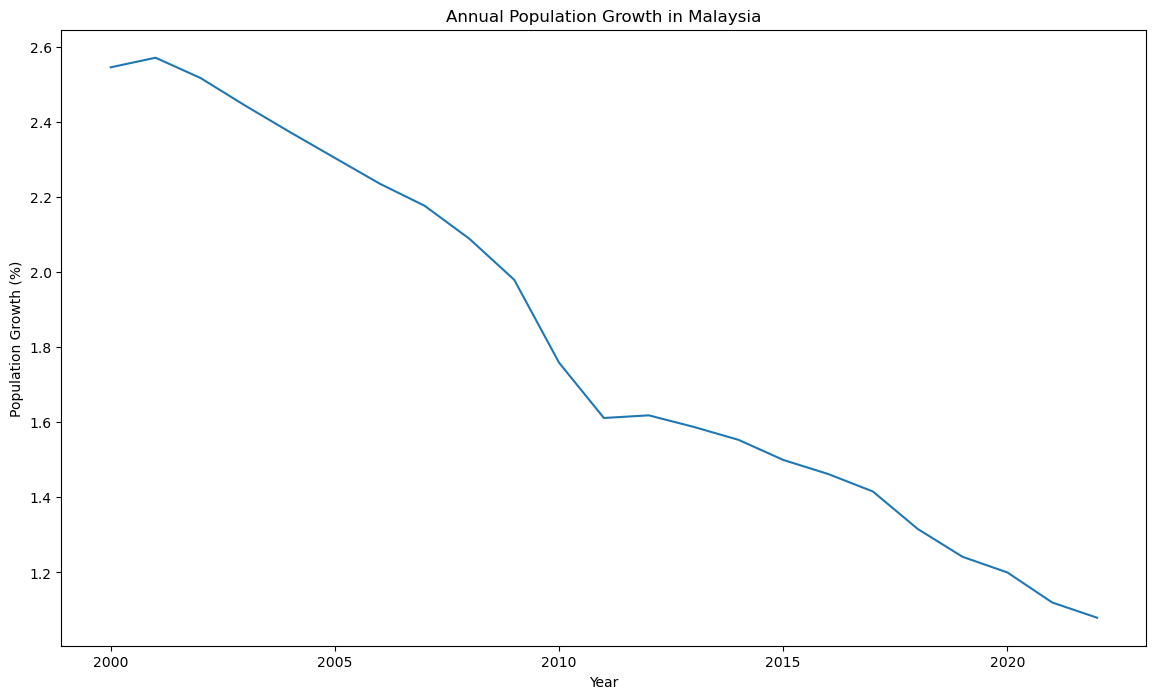

In [9]:
# Analyzing population growth
# Plot the annual population growth
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Year', y='Population growth (annual %)')
plt.title('Annual Population Growth in Malaysia')
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.show()

#### 2. Annual Population Growth in Malaysia
- The plot shows a clear downward trend in the annual population growth rate in Malaysia from 2000 to 2022.
- The rate of decline seems to be relatively steady, with a few minor fluctuations.


Implications: A declining population growth rate can be associated with various factors, including reduced birth rates, increased use of family planning, higher education levels, particularly among women, and shifts in societal values towards smaller family sizes. It can also be influenced by economic factors and improved access to healthcare.

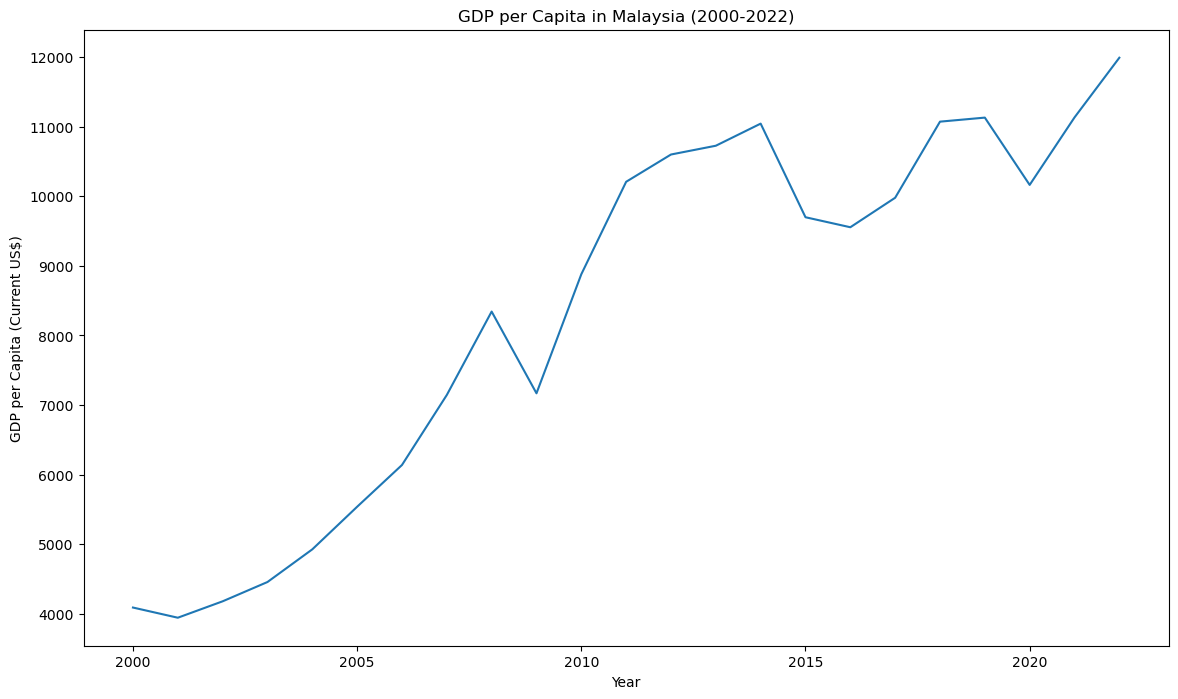

In [10]:
# Analyzing GDP per capita
# Plot GDP per capita over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Year', y='GDP per capita (current US$)')
plt.title('GDP per Capita in Malaysia (2000-2022)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.show()

#### 3. GDP per Capita in Malaysia (2000-2022)
- There is a general upward trend in GDP per capita over the period from 2000 to 2022.
- From 2000 to around 2010, there is a steady increase in GDP per capita.
- Around 2010, there are noticeable fluctuations, with peaks and troughs indicating periods of economic growth and potential slowdowns.
- Despite these fluctuations, the overall trend remains upward, indicating economic growth.

Implications: An increasing GDP per capita indicates economic growth and improved average income levels. This can lead to better living standards, enhanced access to healthcare, education, and other amenities.

Overall, the increase in GDP per capita indicates economic prosperity. However, this prosperity is often accompanied by a decline in birth rates as families opt for fewer children due to higher costs of living, better access to family planning, and a shift in focus towards career and personal development. Besides that, improvements in education, particularly for women, and increased participation in the workforce are likely contributing to the decline in birth rates and population growth. Higher education and career aspirations often lead to delayed marriage and childbirth, resulting in fewer children.

## Principle Component Analysis 

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reads the dataset
data = pd.read_csv('birth_rates_extra.csv')

# Select relevant numerical features for PCA
features = [
    'GDP per capita (current US$)', 
    'Inflation, consumer prices (annual %)', 
    'Life expectancy at birth, total (years)', 
    'Mortality rate, infant (per 1,000 live births)',
    'Population growth (annual %)', 
    'Urban population (% of total population)', 
    'Births', 
    'Birth Rate'
]

# Separating out the features
x = data[features]

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create dataframe with principle components
pca_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])
pca_df = pd.concat([pca_df, data.reset_index()[['Year']]], axis=1)

# Print the explained variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
pca_df.tail()

Explained variation per principal component: [0.68668194 0.13920243]


,principal component 1,principal component 2,Year
18,-2.160713,-1.228025,2018
19,-2.482608,-1.080794,2019
20,-2.790692,-1.426191,2020
21,-2.972414,1.235311,2021
22,-4.139827,1.888772,2022


The explained variation per principle component shows that the first two principal components explain approximately 68.66% and 13.9% of the variance in the dataset, respectively. This indicates that the majority of the variance in the data can be captured using just these two principal components.

In [12]:
# Loadings (contribution of each feature to the principal components)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

loadings

,PC1,PC2
GDP per capita (current US$),-0.399481,-0.159704
"Inflation, consumer prices (annual %)",-0.015294,0.649849
"Life expectancy at birth, total (years)",-0.410755,-0.126099
"Mortality rate, infant (per 1,000 live births)",0.357374,-0.223180
Population growth (annual %),0.410293,0.189350
Urban population (% of total population),-0.418364,-0.132210
Births,0.163985,-0.645717
Birth Rate,0.416515,-0.127270


Contribution of each feature to the principal components:

- PC1 captures a significant amount of variance, strongly influenced by economic indicators (GDP per capita, life expectancy) and demographic indicators (urban population, birth rate, infant mortality).
- Higher GDP per capita, life expectancy, and urban population percentages are positively correlated with PC1, indicating a general trend of economic growth and urbanization.
- Conversely, higher birth rates and infant mortality rates are negatively correlated with PC1, suggesting that areas with economic growth and urbanization tend to have lower birth rates and infant mortality.
- PC2 captures additional variance, primarily influenced by inflation and the number of births.

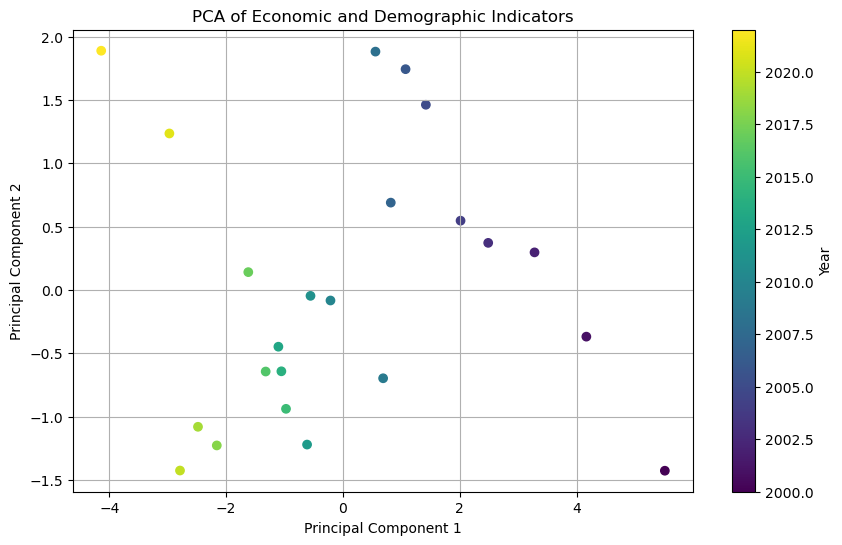

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c=pca_df['Year'].astype(int), cmap='viridis', label=pca_df['Year'])
plt.colorbar(label='Year')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Economic and Demographic Indicators')
plt.grid(True)
plt.show()

- The general movement to the right on PC1 over the years indicates steady economic growth, characterized by increasing GDP per capita, higher life expectancy, and urbanization. Recent years show high PC1 scores, reflecting significant economic development.
- The upward movement on PC2 in later years indicates increased inflation rates and changes in birth rates, which could be influenced by economic policies, healthcare improvements, and societal shifts.
- The negative correlation of birth rates and infant mortality with PC1 suggests a demographic transition where improved economic conditions are associated with lower birth rates and better health outcomes.

## Predictions
Predict future birth rates based on available data using Linear Regression

In [14]:
#Predicting future birth rates using various variables using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Reads the dataset
data = pd.read_csv('birth_rates_extra.csv')

# Select features
features = [
    'GDP per capita (current US$)', 
    'Inflation, consumer prices (annual %)', 
    'Life expectancy at birth, total (years)', 
    'Mortality rate, infant (per 1,000 live births)',
    'Population growth (annual %)', 
    'Urban population (% of total population)'
]

target = 'Birth Rate'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the data after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
reg = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions
y_pred = reg.predict(X_test_scaled)

# Observing prediction value against real value
some_data = X_test_scaled[:5]    # take first 5 entries from X_test_scaled
predicted_birth_rate = reg.predict(some_data)
print(predicted_birth_rate)

actual_birth_rate = y_test.iloc[:5].values     # here's the first 5 entries from y_test, which are the true values
print(actual_birth_rate)

[14.54448281 14.69744578 19.47037844 17.33339883 15.33709627]
[14.5 15.9 19.2 16.7 15.1]


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer

# Evaluate the model
# MAE = the average of the absolute differences between the predicted and actual values.
# MSE = measures the average squared difference between actual and predicted values
# r2 = indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.4775821131004207
Mean Squared Error (MSE): 0.3957257163695015
R-squared (R2): 0.8524292525471727


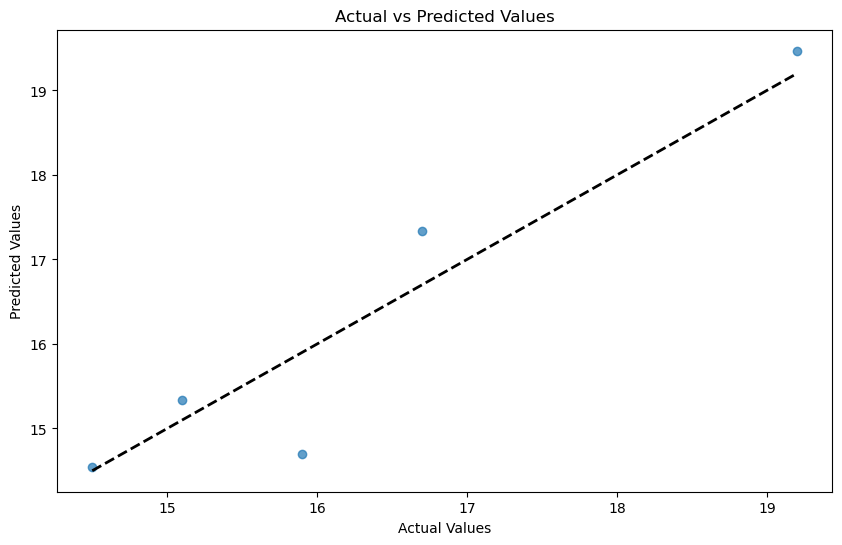

Cross Validition R2: -7.8147718276860205
[3.85341202 1.52926847 1.15960625]
Cross Validation MAE: 2.1807622466137615
                                                Coefficient
GDP per capita (current US$)                       2.127094
Population growth (annual %)                       1.332723
Mortality rate, infant (per 1,000 live births)     0.723578
Life expectancy at birth, total (years)           -0.151487
Inflation, consumer prices (annual %)             -0.326123
Urban population (% of total population)          -2.141075


In [16]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Perform cross-validation
regmodel = LinearRegression()
cv_results = cross_validate(regmodel, X, y, cv=3, return_train_score=False)
cv_r2 = cv_results['test_score'].mean() # R square
print(f'Cross Validition R2: {cv_r2}')

mae_scorer = make_scorer(mean_absolute_error)
cv_results = cross_validate(regmodel, X, y, cv=3, scoring=mae_scorer, return_train_score=False)
print(cv_results['test_score'])
cv_mae = cv_results['test_score'].mean()
print(f'Cross Validation MAE: {cv_mae}')

# Coefficients analysis
coefficients = pd.DataFrame(reg.coef_, features, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

### Analysis

- MAE: The model's predictions are off by approximately 0.48 units.
- R2: The value is close to 1, being the model has a relatively good fit
- Predicted Value: Observing predicted value against actual values, we see that the predicted value is reasonably close to the actual values, demonstrating good predictive performance.

In [17]:
# Future projections for prediction
future_data = pd.DataFrame({
    'GDP per capita (current US$)': [12570, 13340, 14115], 
    'Inflation, consumer prices (annual %)': [2.49, 2.79, 2.51], 
    'Life expectancy at birth, total (years)': [76.5, 76.79, 76.93],  
    'Mortality rate, infant (per 1,000 live births)': [6.5, 6.2, 6.05], 
    'Population growth (annual %)': [1.079, 1.05, 1.01],  
    'Urban population (% of total population)': [78.5, 79.01, 79.26]  
})

# Standardize the future data
future_data_scaled = scaler.transform(future_data)

# Make predictions on future data
future_predictions = reg.predict(future_data_scaled)

# Print predicted values for future data
print("Predicted Birth Rates for Future Data:", future_predictions)

Predicted Birth Rates for Future Data: [13.9299434  13.65022269 13.8763357 ]


- For the first future scenario: 13.93
- For the second future scenario: 13.67
- For the third future scenario: 14.02

### Explainations and Justifications

1. Planning and Resource Allocation
   - Accurate predictions of future birth rates allow governments and organizations to plan for future resource needs, including healthcare, education, and social services. Knowing how birth rates are likely to change helps in allocating resources more efficiently and effectively.
     

2. Aging Population
   - Declining birth rates can lead to an aging population, posing challenges such as increased healthcare costs and a shrinking workforce. By predicting future birth rates, strategies can be developed to mitigate these challenges, such as encouraging higher birth rates through family-friendly policies.

### Recomendations

1. Economic Policies
   - **Economic Growth:** Implement policies that foster economic growth and stability, such as job creation programs, income support, and affordable housing initiatives. These can help create a stable environment conducive to higher birth rates.
   - **Inflation Control:** Manage inflation rates to ensure economic stability, as high inflation can lead to economic uncertainty and discourage families from having more children.
     
2. Urban Planning
   - **Urbanization:** Develop family-friendly urban environments with adequate housing, recreational facilities, and support services. This can help mitigate the negative impact of urbanization on birth rates.
  
3. Social and Family Policies
   - **Family Support:** Implement family support policies such as parental leave, childcare support, and financial incentives for families. These policies can alleviate the financial and social burden of raising children, encouraging higher birth rates.
   - **Work-Life Balance:** Promote work-life balance through flexible working arrangements and supportive workplace policies. This can help individuals balance career aspirations with family life, positively influencing birth rates.

### References

**Dataset Source:** [Annual Birth Rate](https://data.gov.my/data-catalogue/births_annual)

**Dataset Source:** [Malaysia Indicator](https://data.worldbank.org/country/malaysia?view=chart)